# **1. SET-UP**

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/sample_data/MyDrive')

Mounted at /content/sample_data/MyDrive


In [ ]:
import tensorflow as tf
import os
from matplotlib import pyplot as plt
import cv2
import numpy as np
from tensorflow import keras

In [ ]:
data_dir = ('/content/sample_data/MyDrive/MyDrive/lane_detection/data_road/training')

In [ ]:
os.listdir(data_dir)

['image_2', 'gt_image_2']

Text(0.5, 1.0, 'Label')

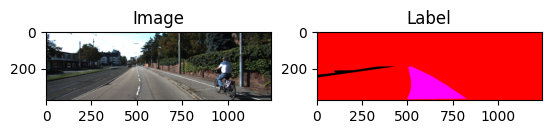

In [ ]:
img = cv2.imread("/content/sample_data/MyDrive/MyDrive/lane_detection/data_road/training/image_2/um_000000.png")
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Image")

label = cv2.imread("/content/sample_data/MyDrive/MyDrive/lane_detection/data_road/training/gt_image_2/um_lane_000000.png")
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(label, cv2.COLOR_BGR2RGB))
plt.title("Label")

# 1.1 Data Loading

In [ ]:
images_folder = ("/content/sample_data/MyDrive/MyDrive/lane_detection/data_road/training/image_2")
ground_truth_folder = ("/content/sample_data/MyDrive/MyDrive/lane_detection/data_road/training/gt_image_2")

In [ ]:
import os
import re

def alphanumeric_key(s):
    # Split the string into a list of strings and numbers
    return [int(text) if text.isdigit() else text.lower() for text in re.split('([0-9]+)', s)]


train_images = []
labels = []

# Load images
image_files = sorted([file for file in os.listdir(images_folder) if file.endswith('.png')], key=alphanumeric_key)
for image_file in image_files:
    image_path = os.path.join(images_folder, image_file)
    image = cv2.imread(image_path)
    resized_image = cv2.resize(image, (256, 256))  # Specify the desired dimensions
    train_images.append(resized_image)

# Load ground truth
ground_truth_files = sorted([file for file in os.listdir(ground_truth_folder) if file.endswith('.png')], key=alphanumeric_key)
for ground_truth_file in ground_truth_files:
    ground_truth_path = os.path.join(ground_truth_folder, ground_truth_file)
    ground_truth = cv2.imread(ground_truth_path)#, cv2.IMREAD_GRAYSCALE)
    resized_ground_truth = cv2.resize(ground_truth, (256, 256))  # Specify the desired dimensions
    labels.append(resized_ground_truth)



# Convert lists to NumPy arrays
train_images = np.array(train_images)
labels = np.array(labels)

# Print the shapes of the arrays
print("train_images shape:", train_images.shape)
print("labels shape:", labels.shape)



train_images shape: (193, 256, 256, 3)
labels shape: (193, 256, 256, 3)


In [ ]:
train_images = np.array(train_images)
labels = np.array(labels)

# Print the shapes of the arrays (optional)
print("train_images shape:", train_images.shape)
print("labels shape:", labels.shape)

train_images shape: (193, 224, 224, 3)
labels shape: (193, 224, 224, 3)


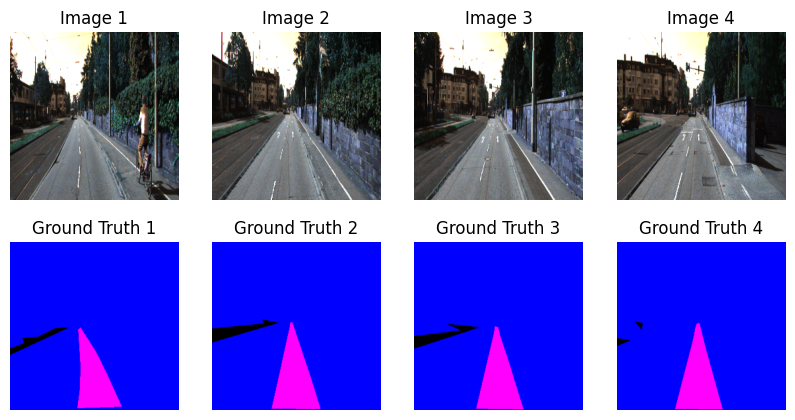

In [ ]:
from PIL import Image as im
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.subplot(2, 4, i+1)
    data = im.fromarray(train_images[i])
    plt.imshow(data)
    plt.title('Image {}'.format(i+1))
    plt.axis('off')

    plt.subplot(2, 4, i+5)
    data2 = im.fromarray(labels[i])
    plt.imshow(data2)
    plt.title('Ground Truth {}'.format(i+1))
    plt.axis('off')

plt.show()

# **2. DATA PRE-PROCESSING**

# 2.1 Normalization

In [ ]:
train_images[0].max()

255

In [ ]:
np.unique(scaled_labels)

In [ ]:
labels[0].max()

255

In [ ]:
# scaled_train_images = train_images/255
scaled_labels = labels/255

In [ ]:
type(labels)

numpy.ndarray

In [ ]:
train_images = train_images//255

In [ ]:
print(train_images[0].max())
print(scaled_labels[0].max())

In [ ]:
# Normalize and reshape the mask set (Y)
scaled_labels = np.array(scaled_labels, dtype=int)


In [ ]:
scaled_labels.shape

(193, 224, 224, 3)

In [ ]:
scaled_labels[0].max()

1

# 2.2 Shuffling

In [ ]:
X[0].shape

(224, 224, 3)

In [ ]:
from sklearn.utils import shuffle

X, Y = shuffle(train_images, scaled_labels, random_state=100)

In [ ]:
Y[0].max()

1.0

In [ ]:
Y.min(), Y.max()

(0.0, 1.0)

In [ ]:
X.min(), X.max()

(0, 255)

# 2.3 Train/Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=.1, random_state=100)

In [ ]:
print("The training set is : ", X_train.shape, X_val.shape)
print("The testing set is :", Y_train.shape, Y_val.shape)

The training set is :  (173, 256, 256, 3) (20, 256, 256, 3)
The testing set is : (173, 256, 256, 3) (20, 256, 256, 3)


In [ ]:
print("Length of X_train:", len(X_train))
print("Length of X_val:", len(X_val))
print("Length of Y_train:", len(Y_train))
print("Length of Y_val:", len(Y_val))

Length of X_train: 173
Length of X_val: 20
Length of Y_train: 173
Length of Y_val: 20


In [ ]:
# free the RAM from undesired clutters
import gc
del X, Y
gc.collect()

0

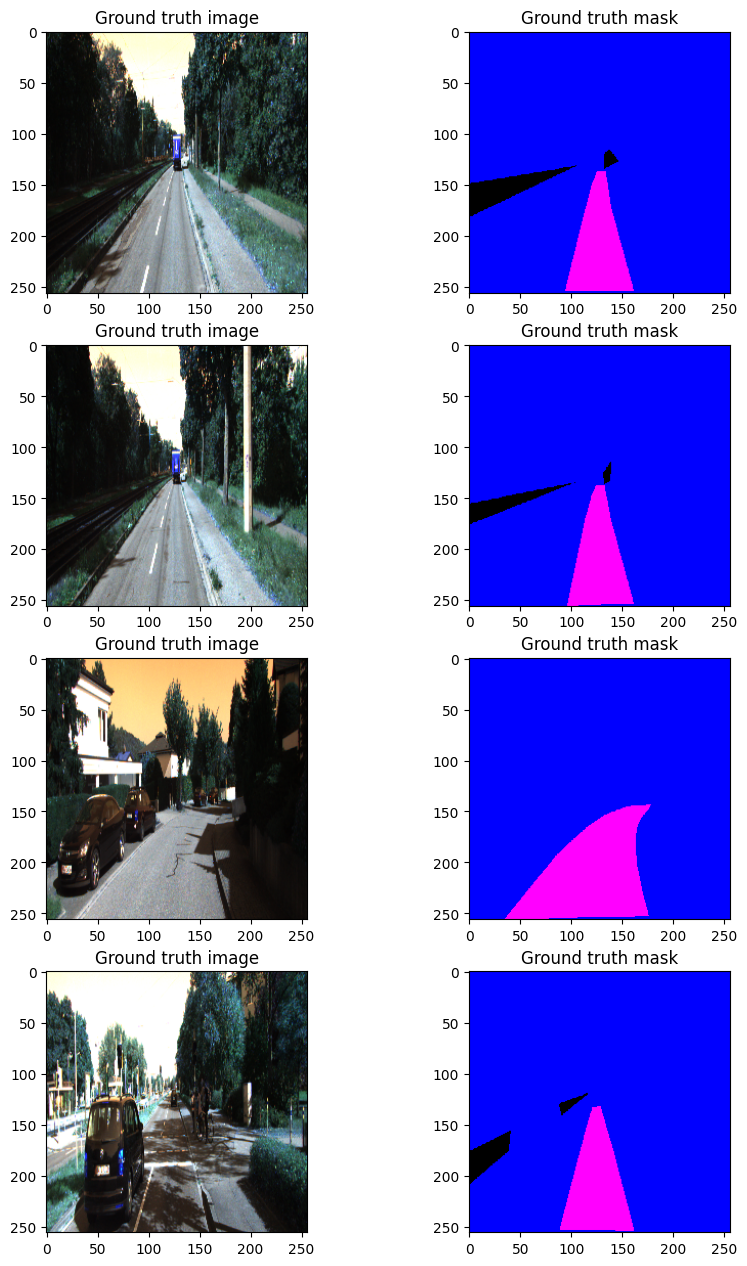

In [ ]:
# visualize some samples from the training set
plt.figure(figsize=(10, 40))
s, e = 80, 84
index = 1

for i, j in zip(X_train[s:e], Y_train[s:e]):
    plt.subplot(10, 2, index)
    plt.imshow(i/255.)
    plt.title('Ground truth image')

    plt.subplot(10, 2, index+1)
    plt.imshow(j*255, cmap='gray')
    plt.title('Ground truth mask')
    index += 2

# 2.4 Data Augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [ ]:
val_datagen = ImageDataGenerator(rescale=1. / 255)

In [ ]:
train_generator = train_datagen.flow(X_train, Y_train, batch_size=8)

In [ ]:
val_generator = val_datagen.flow(X_val, Y_val, batch_size=8)

In [ ]:
Y_val[0].max()

1

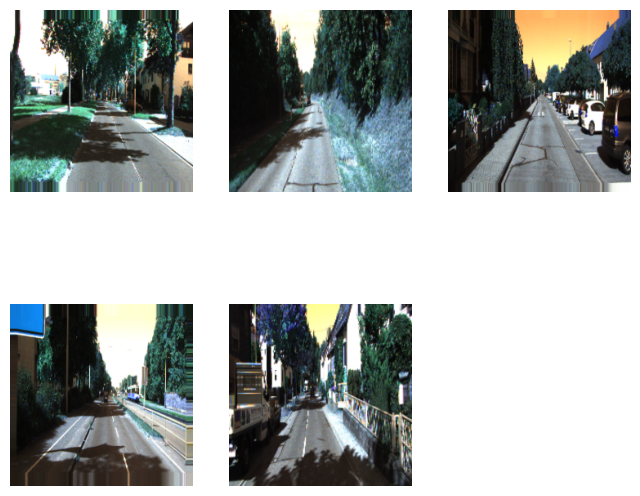

In [ ]:
plt.imshow
plt.figure(figsize=(8, 7))
for i in range(5):
  batch_X, batch_y = train_generator.next()
  ax = plt.subplot(2, 3, i + 1)
  plt.imshow(batch_X[0])
  plt.axis("off")

# **3. MODEL ARCHITECTURE**

In [ ]:
from keras.layers import Input, Conv2D, MaxPooling2D, Dropout, UpSampling2D, Concatenate
from keras.models import Model
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dropout, UpSampling2D, Conv2DTranspose, Conv2D, MaxPooling2D, BatchNormalization
from keras import regularizers
from tensorflow.keras import models, layers, Sequential
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
def unet(input_size=(256,256,3)):
    inputs = Input(input_size)
    rescale = keras.layers.Rescaling(1./255)(inputs)
    # Encoder
    conv1 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(rescale)
    conv1 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    # Decoder
    conv5 = Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation='relu', padding='same', kernel_initializer='he_normal')(UpSampling2D(size=(2,2))(drop5))
    merge6 = Concatenate(axis=3)([conv4, up6])
    conv6 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv6)

    up7 = Conv2D(256, 2, activation='relu', padding='same', kernel_initializer='he_normal')(UpSampling2D(size=(2,2))(conv6))
    merge7 = Concatenate(axis=3)([conv3, up7])
    conv7 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv7)

    up8 = Conv2D(128, 2, activation='relu', padding='same', kernel_initializer='he_normal')(UpSampling2D(size=(2,2))(conv7))
    merge8 = Concatenate(axis=3)([conv2, up8])
    conv8 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv8)

    up9 = Conv2D(64, 2, activation='relu', padding='same', kernel_initializer='he_normal')(UpSampling2D(size=(2,2))(conv8))
    merge9 = Concatenate(axis=3)([conv1, up9])
    conv9 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv9)

    outputs = Conv2D(3, 1, activation='sigmoid')(conv9)

    model = Model(inputs=inputs, outputs=outputs)

    return model

model = unet()

In [ ]:
batch_size = 8
epochs = 50
pool_size = (2, 2)
input_shape = (224,224,3)
steps_per_epoch=len(X_train)//batch_size

In [ ]:
datagen = ImageDataGenerator(channel_shift_range=0.2)
X_train = datagen.fit(X_train)

In [ ]:
# Compile the model
from tensorflow import keras
model.compile(optimizer= "adam", loss=keras.losses.BinaryFocalCrossentropy(), metrics=['accuracy'])
#model.trainable = False
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 rescaling_1 (Rescaling)     (None, 256, 256, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv2d_23 (Conv2D)          (None, 256, 256, 64)         1792      ['rescaling_1[0][0]']         
                                                                                                  
 conv2d_24 (Conv2D)          (None, 256, 256, 64)         36928     ['conv2d_23[0][0]']           
                                                                                            

In [ ]:
batch_size = 15
epochs = 50
pool_size = (2, 2)
input_shape = (224,224,3)
steps_per_epoch=len(X_train)//batch_size

In [ ]:
log_dir = ("/content/sample_data/MyDrive/MyDrive/lane_detection/logs")

In [ ]:
callbacks = tf.keras.callbacks.TensorBoard(log_dir = log_dir)

# 3.1 Training Procedure

In [ ]:
model.fit(X_train,Y_train, epochs = 30, callbacks= callbacks, batch_size= 20 , validation_data=(X_val,Y_val))

Epoch 1/30
9/9 [==============================] - 97s 5s/step - loss: 0.4906 - accuracy: 0.6155 - val_loss: 0.0375 - val_accuracy: 0.8839
Epoch 2/30
9/9 [==============================] - 13s 1s/step - loss: 0.0437 - accuracy: 0.8834 - val_loss: 0.0313 - val_accuracy: 0.8842
Epoch 3/30
9/9 [==============================] - 12s 1s/step - loss: 0.0296 - accuracy: 0.8835 - val_loss: 0.0232 - val_accuracy: 0.8842
Epoch 4/30
9/9 [==============================] - 12s 1s/step - loss: 0.0251 - accuracy: 0.8835 - val_loss: 0.0202 - val_accuracy: 0.8842
Epoch 5/30
9/9 [==============================] - 12s 1s/step - loss: 0.0224 - accuracy: 0.8835 - val_loss: 0.0194 - val_accuracy: 0.8842
Epoch 6/30
9/9 [==============================] - 13s 1s/step - loss: 0.0202 - accuracy: 0.8835 - val_loss: 0.0160 - val_accuracy: 0.8842
Epoch 7/30
9/9 [==============================] - 13s 1s/step - loss: 0.0179 - accuracy: 0.8835 - val_loss: 0.0157 - val_accuracy: 0.8842
Epoch 8/30
9/9 [==================

# **4. PERFORMANCE EVALUATION**

In [ ]:
preds = model.predict(X_val)
preds.max(), preds.min()

1/1 [==============================] - 1s 719ms/step


(1.0, 0.0)

In [ ]:
accuracy = tf.keras.metrics.Accuracy()
precision = tf.keras.metrics.Precision()
recal = tf.keras.metrics.Recall()
iou = tf.keras.metrics.IoU(num_classes=2, target_class_ids=[1])


# accuracy
accuracy.update_state(Y_val, preds)
accuracy_value = accuracy.result().numpy()
# precision
precision.update_state(Y_val, preds)
precision_value = precision.result().numpy()
# recal
recal.update_state(Y_val, preds)
recal_value = recal.result().numpy()
# f1 score
f1_score = 2 / ((1 / precision_value) + (1 / recal_value))

# Intersection over union (IoU)
iou.update_state(Y_val, preds)
iou_value = iou.result().numpy()

print("Accuracy:", accuracy_value)
print("Precision:", precision_value)
print("Recal:", recal_value)
print('F1 Score: ', f1_score)
print('IoU: ', iou_value)

Accuracy: 0.23908971
Precision: 0.9948613
Recal: 0.9846208
F1 Score:  0.9897145684761379
IoU:  0.24196331


# 4.1 Testing on validation data

1/1 [==============================] - 2s 2s/step


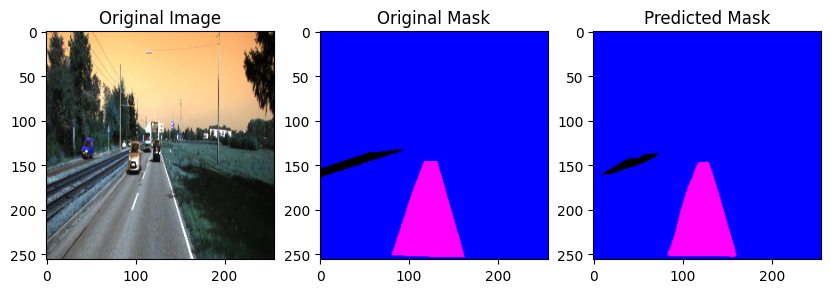

1/1 [==============================] - 0s 29ms/step


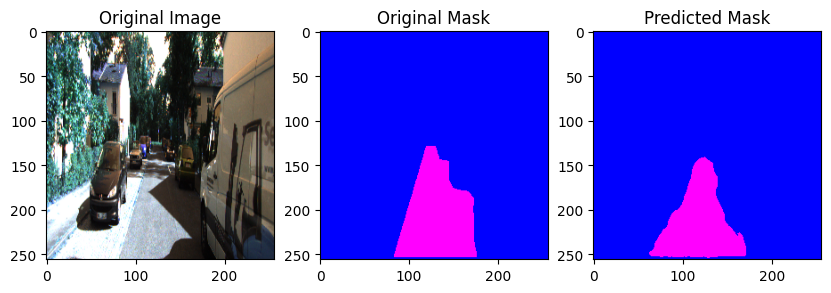

1/1 [==============================] - 0s 37ms/step


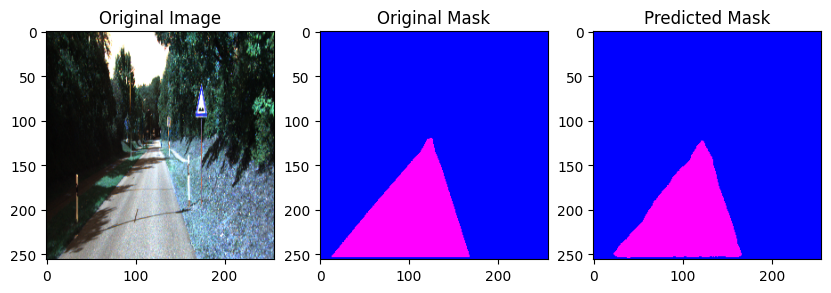

1/1 [==============================] - 0s 20ms/step


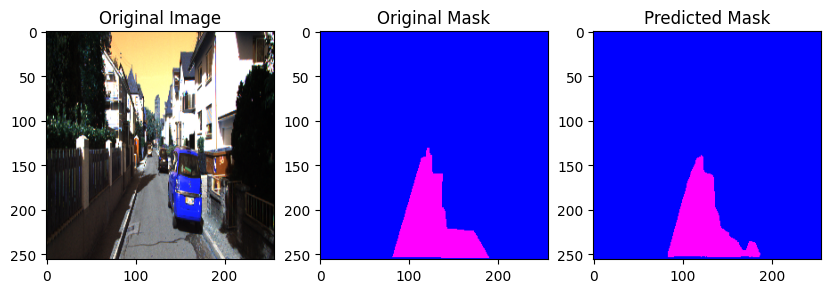

1/1 [==============================] - 0s 19ms/step


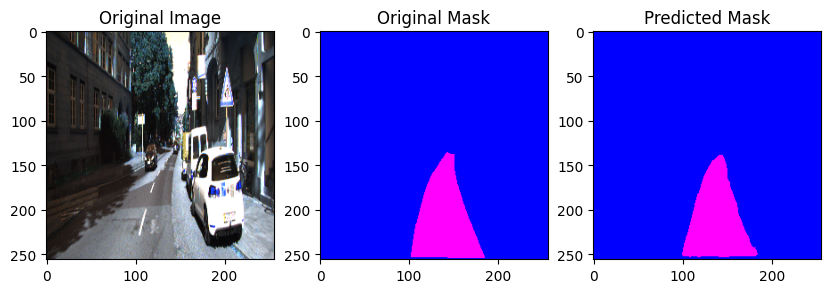

1/1 [==============================] - 0s 19ms/step


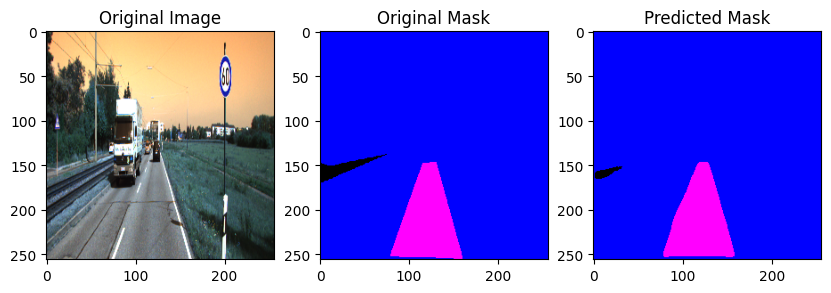

1/1 [==============================] - 0s 18ms/step


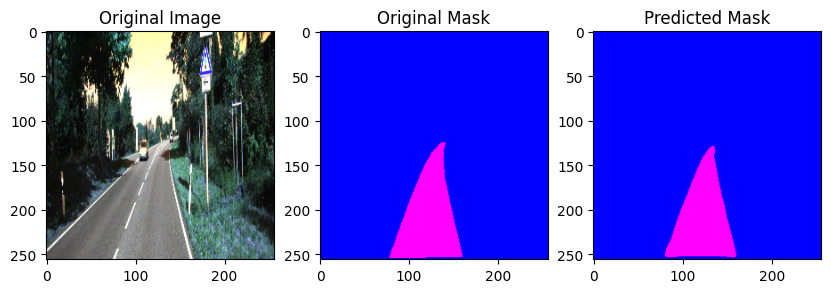

1/1 [==============================] - 0s 18ms/step


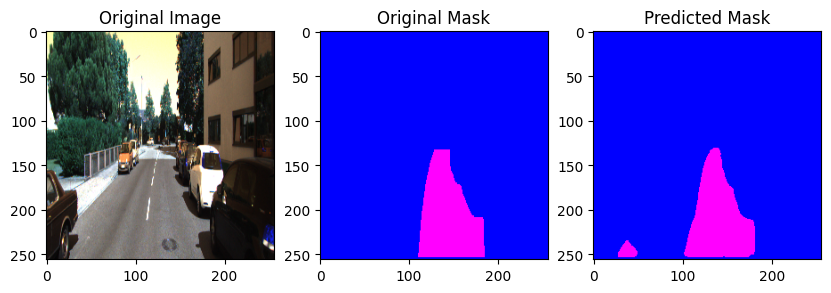

1/1 [==============================] - 0s 18ms/step


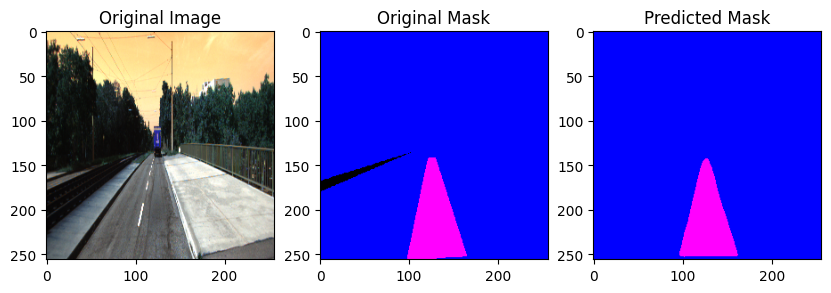

1/1 [==============================] - 0s 27ms/step


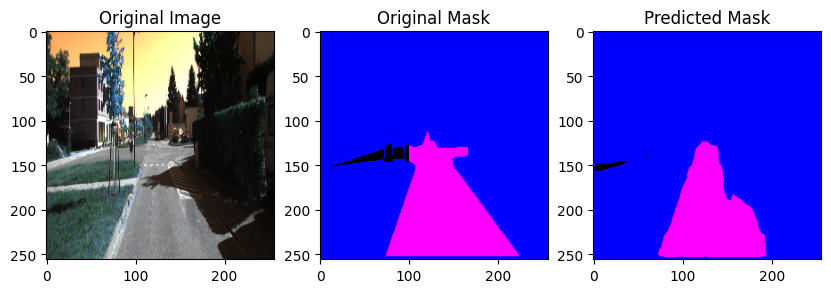

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_val is a list or array containing image data
# Modify this according to the actual structure of your data

# Function to preprocess and predict using the model
def predict_and_show(image_data, original_mask, model):
    # Preprocess the image data
    test_array = np.array(image_data)

    # Predict using the model
    yhat = model.predict(np.expand_dims(test_array, 0))
    yhat = np.round(yhat.squeeze())  # Remove singleton dimensions and round to 0 or 1

    # Create a mask image using PIL
    mask_image = Image.fromarray((yhat * 255).astype(np.uint8))

    # Display the original image and predicted mask side by side
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(image_data)
    plt.title("Original Image")

    plt.subplot(1, 3, 2)
    plt.imshow(original_mask*255)
    plt.title("Original Mask")

    plt.subplot(1, 3, 3)
    plt.imshow(np.array(yhat*255).astype(np.uint8))  # Specify the colormap if it's a grayscale image
    plt.title("Predicted Mask")

    plt.show()

# Assuming X_val contains the image data for validation
for i in range(10):
    image_data = X_val[i]
    original_mask = Y_val[i]
    predict_and_show(image_data,original_mask, model)


# 4.2 Testing on Test data

In [ ]:
test_dir = "/content/sample_data/MyDrive/MyDrive/lane_detection/data_road/testing/image_2"
import os
import re

def alphanumeric_key(s):
    # Split the string into a list of strings and numbers
    return [int(text) if text.isdigit() else text.lower() for text in re.split('([0-9]+)', s)]


test_images = []

# Load images
image_files = sorted([file for file in os.listdir(test_dir) if file.endswith('.png')], key=alphanumeric_key)
for image_file in image_files:
    image_path = os.path.join(test_dir, image_file)
    image = cv2.imread(image_path)
    resized_image = cv2.resize(image, (224, 224))  # Specify the desired dimensions
    test_images.append(resized_image)


# Convert lists to NumPy arrays
test_images = np.array(test_images)

# Print the shapes of the arrays
print("test_images shape:", test_images.shape)

test_images shape: (290, 224, 224, 3)


1/1 [==============================] - 2s 2s/step


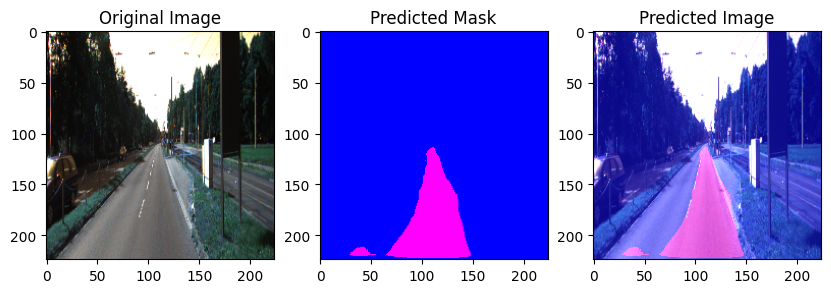

1/1 [==============================] - 1s 967ms/step


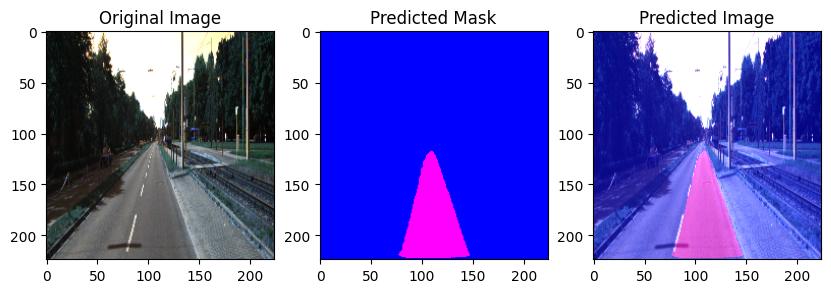

1/1 [==============================] - 1s 979ms/step


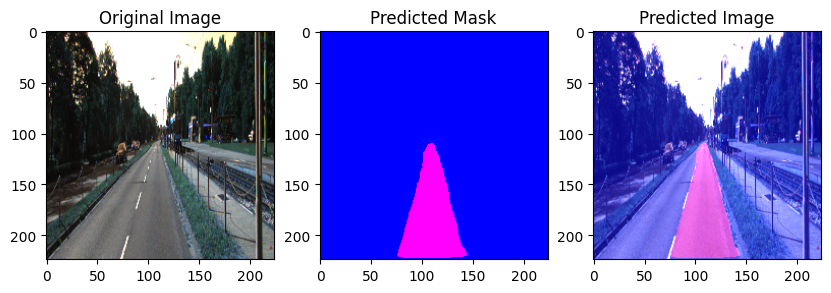

1/1 [==============================] - 1s 976ms/step


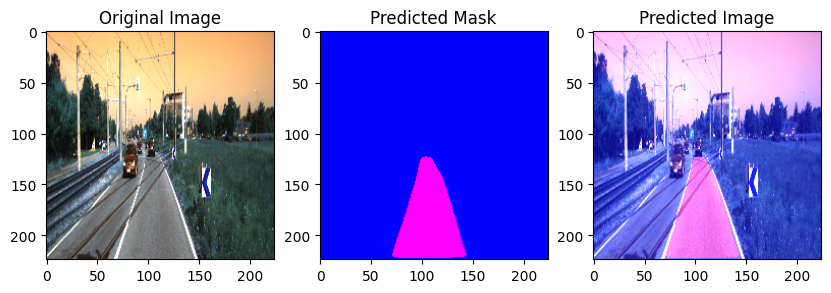

1/1 [==============================] - 1s 958ms/step


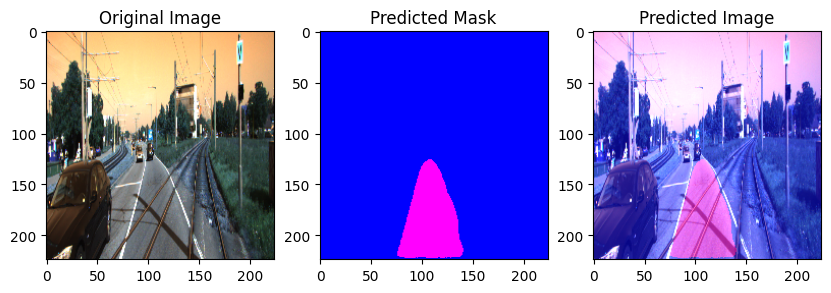

1/1 [==============================] - 1s 978ms/step


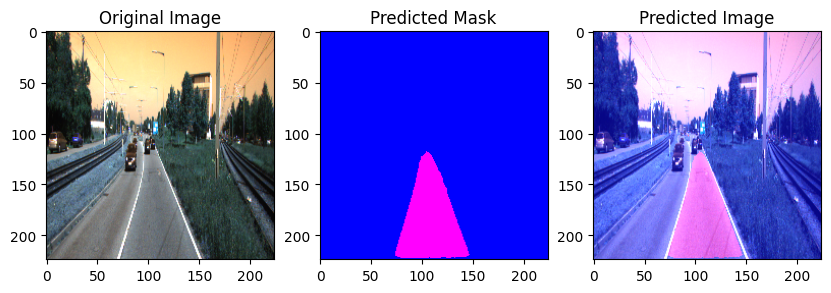

1/1 [==============================] - 1s 965ms/step


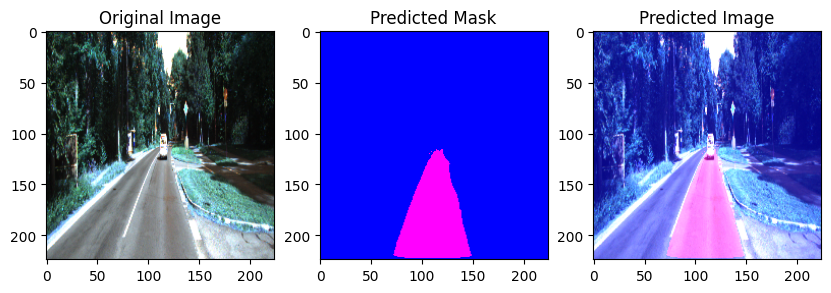

1/1 [==============================] - 1s 974ms/step


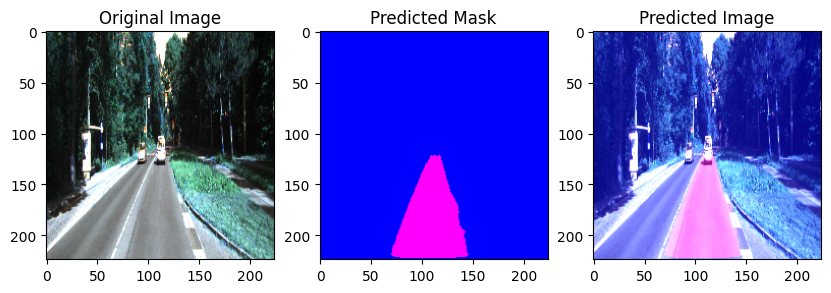

1/1 [==============================] - 1s 1s/step


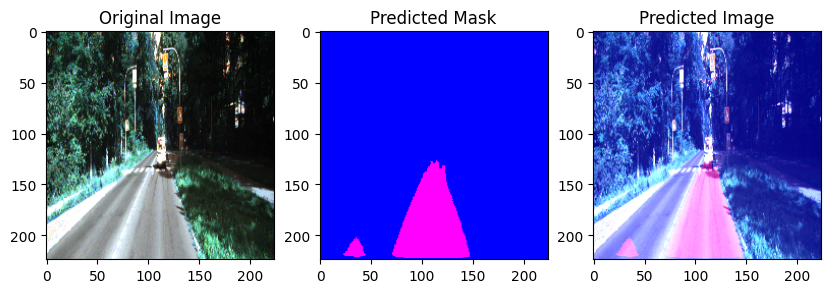

1/1 [==============================] - 1s 974ms/step


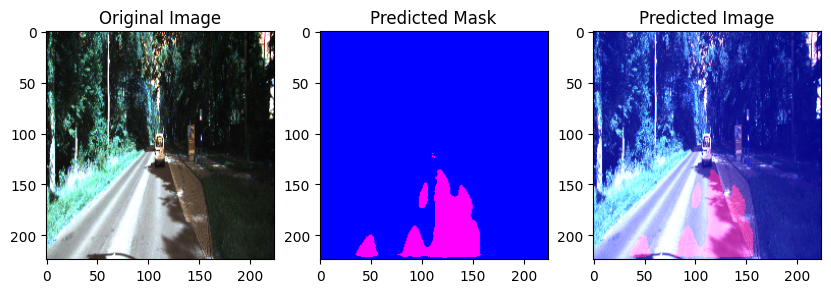

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_val is a list or array containing image data
# Modify this according to the actual structure of your data

# Function to preprocess and predict using the model
def predict_and_show(image_data, model):
    # Preprocess the image data
    test_array = np.array(image_data)

    # Predict using the model
    yhat = model.predict(np.expand_dims(test_array, 0))
    yhat = np.round(yhat.squeeze())  # Remove singleton dimensions and round to 0 or 1

    # Create a mask image using PIL
    mask_array = (yhat * 255).astype(np.uint8)
    mask_img = Image.fromarray(mask_array)

    # overlaying mask on the original image
    ground_truth_mask = cv2.resize(mask_array, (image_data.shape[1], image_data.shape[0]))
    result_image = cv2.addWeighted(image_data, 1, ground_truth_mask, 0.5, 0)


    # Display the original image and predicted mask side by side
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(image_data)
    plt.title("Original Image")

    plt.subplot(1, 3, 2)
    plt.imshow(mask_img, cmap='gray')  # Specify the colormap if it's a grayscale image
    plt.title("Predicted Mask")

    plt.subplot(1, 3, 3)
    plt.imshow(result_image)  # Specify the colormap if it's a grayscale image
    plt.title("Predicted Image")


    plt.show()

# Assuming X_val contains the image data for validation
for i in range(10):
    image_data = test_images[i]
    predict_and_show(image_data, model)


# 4.3 Testing on Video

In [ ]:
video_path = "/content/sample_data/MyDrive/MyDrive/lane_classifier/testing/blender.mp4"
cap = cv2.VideoCapture(video_path)

# Define the codec using VideoWriter_fourcc() and create a VideoWriter object
# bing code
import time

# Get video properties
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Create VideoWriter object to save the output video
output_video_path = '/content/sample_data/MyDrive/MyDrive/lane_detection/testing/output7.mp4'
fourcc = cv2.VideoWriter_fourcc(*'MP4V')  # You can choose other codecs as well
out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

# Process each frame in the video
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Resize the frame to the desired input size of the model
    resized_frame = cv2.resize(frame, (224, 224))

    # Predict using the model
    pred = model.predict(np.expand_dims(resized_frame, 0))
    pred = np.round(pred.squeeze())
    mask_img = (pred * 255).astype(np.uint8)

    # Resize the mask to match the original frame dimensions
    ground_truth_mask = cv2.resize(mask_img, (width, height))

    # Apply the mask to the original frame to highlight the lane region
    result_frame = cv2.addWeighted(frame, 1, ground_truth_mask, 0.5, 0)

    # Display the result (optional)
    #out.write( result_frame)

    # Write the frame to the output video file
    out.write(result_frame)

    # Break the loop if 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture and writer objects
cap.release()
out.release()
cv2.destroyAllWindows()



1/1 [==============================] - 0s 36ms/step


# **5. SAVING THE MODEL**

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model_dir = ("/content/sample_data/MyDrive/MyDrive/lane_detection/model")

In [ ]:
os.listdir(model_dir)

['lane_detection_new.h5',
 'lane_classifier.h5',
 'lane_detection_floatY.h5',
 'lane_detection_256.h5',
 'lane_detection.h5']

In [ ]:
model.save(os.path.join(model_dir, 'lane_detection_floatY.h5'))

In [ ]:
model = load_model(os.path.join(model_dir, 'lane_detection_floatY.h5'))

In [ ]:
model

1/1 [==============================] - 1s 1s/step


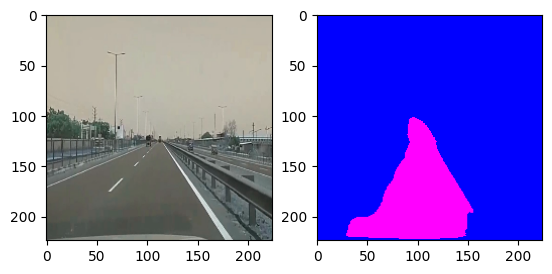

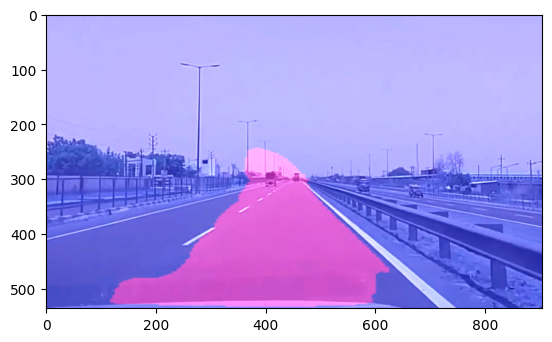

In [ ]:
test_img = cv2.imread("/content/sample_data/MyDrive/MyDrive/lane_classifier/testing/broken_lane6.jpg")
resize = cv2.resize(test_img, (224,224))
test_array = np.array(resize)
pred = model.predict(np.expand_dims((test_array),0))
pred = np.round(pred.squeeze())
mask_img = (pred * 255).astype(np.uint8)
plt.subplot(1,2,1)
plt.imshow(resize)
plt.subplot(1,2,2)
plt.imshow(mask_img)
plt.show()


# Load the original image and ground truth image
#original_image = cv2.imread('original_image.jpg')  # Replace with your file path
#ground_truth_image = cv2.imread('ground_truth_image.jpg')  # Replace with your file path

# Resize the ground truth image to match the original image dimensions (if needed)
ground_truth_mask = cv2.resize(mask_img, (test_img.shape[1], test_img.shape[0]))

# Apply the mask to the original image to highlight the lane region
result_image = cv2.addWeighted(test_img, 1, ground_truth_mask, 0.5, 0)

# Display the result (optional)
plt.imshow(result_image)
plt.show()